In [58]:
import sqlite3
from sql import run
run.prettytable.__dict__.setdefault('DEFAULT', run.prettytable.DEFAULT)

/var/folders/p7/d9_mnjys5ss5hl9mmyf2hsgr0000gn/T/ipykernel_44931/2944889590.py:3: DeprecationWarning: the 'DEFAULT' constant is deprecated, use the 'TableStyle' enum instead
  run.prettytable.__dict__.setdefault('DEFAULT', run.prettytable.DEFAULT)


<TableStyle.DEFAULT: 10>

In [59]:
%load_ext sql
%sql sqlite:///nepal_eq.db

In [92]:
%%sql
select *
from sqlite_schema

 * sqlite:///nepal_eq.db
Done.


[('table', 'building_damage', 'building_damage', 24282, 'CREATE TABLE "building_damage" (\n\t"area_assesed"\tTEXT,\n\t"building_id"\tREAL,\n\t"damage_overall_collapse"\tTEXT,\n\t"damage_overall_leaning"\tTE ... (3025 characters truncated) ... ide"\tINTEGER,\n\t"has_geotechnical_risk_rock_fall"\tINTEGER,\n\t"has_geotechnical_risk_flood"\tINTEGER,\n\t"has_geotechnical_risk_other"\tINTEGER\n)'),
 ('table', 'building_structure', 'building_structure', 78109, 'CREATE TABLE "building_structure" (\n\t"age_building"\tINTEGER,\n\t"building_id"\tREAL,\n\t"condition_post_eq"\tTEXT,\n\t"count_floors_post_eq"\tINTE ... (213 characters truncated) ... _type"\tTEXT,\n\t"plan_configuration"\tTEXT,\n\t"plinth_area_sq_ft"\tINTEGER,\n\t"position"\tTEXT,\n\t"roof_type"\tTEXT,\n\t"superstructure"\tTEXT\n)'),
 ('table', 'household_demographics', 'household_demographics', 109183, 'CREATE TABLE "household_demographics" (\n\t"household_id"\tREAL,\n\t"gender_household_head"\tTEXT,\n\t"age_household_head"\tREAL,\n\t"caste_household ... (15 characters truncated) ... ucation_level_household_head"\tTEXT,\n\t"income_level_household"\tTEXT,\n\t"size_household"\tREAL,\n\t"is_bank_account_present_in_household"\tREAL\n)'),
 ('table', 'id_map', 'id_map', 3, 'CREATE TABLE "id_map" (\n\t"building_id"\tREAL,\n\t"district_id"\tINTEGER,\n\t"vdcmun_id"\tINTEGER,\n\t"household_id"\tTEXT\n)')]

In [93]:
%%sql
select name from sqlite_schema
where type = 'table'

 * sqlite:///nepal_eq.db
Done.


name
building_damage
building_structure
household_demographics
id_map


In [63]:
%%sql
select *
from id_map 
limit 5

 * sqlite:///nepal_eq.db
Done.


building_id,district_id,vdcmun_id,household_id
120101000011.0,12,1207,12010100001101.0
120101000021.0,12,1207,12010100002101.0
120101000031.0,12,1207,12010100003101.0
120101000041.0,12,1207,12010100004101.0
120101000051.0,12,1207,12010100005101.0


In [64]:
%%sql
select count (*)
from id_map

 * sqlite:///nepal_eq.db
Done.


count (*)
818786


In [94]:
%%sql
select distinct (district_id)
from id_map


 * sqlite:///nepal_eq.db
Done.


district_id
12
20
21
22
23
24
28
29
30
31


In [66]:
%%sql
select count(distinct(building_id))
from id_map

 * sqlite:///nepal_eq.db
Done.


count(distinct(building_id))
762106


In [67]:
%%sql
select *
from id_map
where district_id = 36
limit 5

 * sqlite:///nepal_eq.db
Done.


building_id,district_id,vdcmun_id,household_id
360106001171.0,36,3609,None
360106001181.0,36,3609,36010600118101.0
360107000161.0,36,3609,36010700016101.0
360107000381.0,36,3609,36010700038101.0
360202000691.0,36,3601,None


In [68]:
%%sql
select count(distinct(building_id))
from id_map
where district_id = 36

 * sqlite:///nepal_eq.db
Done.


count(distinct(building_id))
78074


In [69]:
%%sql
select *
from building_structure
limit 5

 * sqlite:///nepal_eq.db
Done.


age_building,building_id,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure
9,120101000011.0,Damaged-Used in risk,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,288,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
15,120101000021.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,364,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
20,120101000031.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,384,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
20,120101000041.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,312,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
30,120101000051.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,308,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone


In [70]:
%%sql
select count(building_id)
from building_structure


 * sqlite:///nepal_eq.db
Done.


count(building_id)
762106


In [71]:
%%sql
select *
from id_map
join building_structure on id_map.building_id = building_structure.building_id
where id_map.district_id = 36
limit 4


 * sqlite:///nepal_eq.db
Done.


building_id,district_id,vdcmun_id,household_id,age_building,building_id_1,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure
360106001171.0,36,3609,None,4,360106001171.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
360106001181.0,36,3609,36010600118101.0,15,360106001181.0,Damaged-Rubble unclear,0,1,Mud mortar-Stone/Brick,Mud,0,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone
360107000161.0,36,3609,36010700016101.0,25,360107000161.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
360107000381.0,36,3609,36010700038101.0,22,360107000381.0,Damaged-Rubble clear,0,2,Mud mortar-Stone/Brick,Mud,0,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone


In [72]:
%%sql
select distinct(id_map.building_id), building_structure.*
from id_map
join building_structure on id_map.building_id = building_structure.building_id
where id_map.district_id = 36
limit 5

 * sqlite:///nepal_eq.db
Done.


building_id,age_building,building_id_1,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure
360106001171.0,4,360106001171.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
360106001181.0,15,360106001181.0,Damaged-Rubble unclear,0,1,Mud mortar-Stone/Brick,Mud,0,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone
360107000161.0,25,360107000161.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
360107000381.0,22,360107000381.0,Damaged-Rubble clear,0,2,Mud mortar-Stone/Brick,Mud,0,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
360202000691.0,20,360202000691.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Brick/Stone,0,14,Flat,TImber/Bamboo-Mud,Rectangular,240,Attached-1 side,Bamboo/Timber-Heavy roof,mud_mortar_stone


In [76]:
%%sql
select distinct(damage_grade)
from building_damage


 * sqlite:///nepal_eq.db
Done.


damage_grade
Grade 3
Grade 5
Grade 2
Grade 1
Grade 4
None


In [79]:
%%sql
select distinct(id_map.building_id), building_structure.*, building_damage.building_id
from id_map
join building_structure on id_map.building_id = building_structure.building_id
join building_damage on id_map.building_id = building_damage.building_id
where id_map.district_id = 36
limit 5

 * sqlite:///nepal_eq.db
Done.


building_id,age_building,building_id_1,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,building_id_2
360106001171.0,4,360106001171.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,360106001171.0
360106001181.0,15,360106001181.0,Damaged-Rubble unclear,0,1,Mud mortar-Stone/Brick,Mud,0,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone,360106001181.0
360107000161.0,25,360107000161.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,360107000161.0
360107000381.0,22,360107000381.0,Damaged-Rubble clear,0,2,Mud mortar-Stone/Brick,Mud,0,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,360107000381.0
360202000691.0,20,360202000691.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Brick/Stone,0,14,Flat,TImber/Bamboo-Mud,Rectangular,240,Attached-1 side,Bamboo/Timber-Heavy roof,mud_mortar_stone,360202000691.0


In [60]:
conn = sqlite3.connect("/Users/mac/Desktop/venv/Gomycode/nepal_eq.db")

In [61]:
query= '''
select distinct(id_map.building_id) as b_id, building_structure.*, building_damage.damage_grade
from id_map
join building_structure on id_map.building_id = building_structure.building_id
join building_damage on id_map.building_id = building_damage.building_id
where id_map.district_id = 36
'''

In [62]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_sql(query, conn, index_col='b_id')

In [114]:
df.to_csv("cleaned_nepal_earthquake.csv")

In [64]:
df = pd.read_csv("cleaned_nepal_earthquake.csv")

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78074 entries, 0 to 78073
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   b_id                    78074 non-null  float64
 1   age_building            78074 non-null  int64  
 2   building_id             78074 non-null  float64
 3   condition_post_eq       78074 non-null  object 
 4   count_floors_post_eq    78074 non-null  int64  
 5   count_floors_pre_eq     78074 non-null  int64  
 6   foundation_type         78074 non-null  object 
 7   ground_floor_type       78074 non-null  object 
 8   height_ft_post_eq       78074 non-null  int64  
 9   height_ft_pre_eq        78074 non-null  int64  
 10  land_surface_condition  78074 non-null  object 
 11  other_floor_type        78074 non-null  object 
 12  plan_configuration      78074 non-null  object 
 13  plinth_area_sq_ft       78074 non-null  int64  
 14  position                78074 non-null

In [65]:
drop_cols = [col for col in df.columns if 'post_eq' in col]

In [66]:
df['damage_grade'] = df['damage_grade'].str[-1].astype(int)
df['severe_damage'] = (df['damage_grade']>3).astype(int)

In [67]:
drop_cols.append('damage_grade')

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

In [69]:
correlation = df.select_dtypes('number').corr()

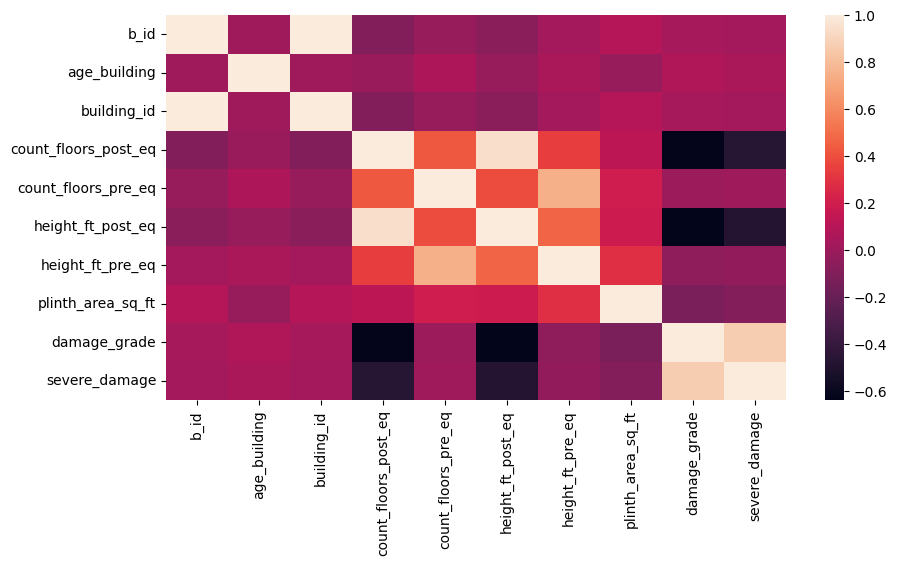

In [125]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation)
plt.show()

In [70]:
drop_cols.append('building_id')

In [71]:
def wrangle(db_path):
    conn = sqlite3.connect(db_path)

    query= '''
    select distinct(id_map.building_id) as b_id, building_structure.*, building_damage.damage_grade
    from id_map
    join building_structure on id_map.building_id = building_structure.building_id
    join building_damage on id_map.building_id = building_damage.building_id
    where id_map.district_id = 36
    '''

    df = pd.read_sql(query, conn, index_col='b_id')

    drop_cols = [col for col in df.columns if 'post_eq' in col]

    df['damage_grade'] = df['damage_grade'].str[-1].astype(int)
    df['severe_damage'] = (df['damage_grade']>3).astype(int)

    drop_cols.append('damage_grade')

    correlation = df.select_dtypes('number').corr()

    df.drop(columns=drop_cols, inplace=True)
    return df

In [72]:
df = wrangle("/Users/mac/Desktop/venv/Gomycode/nepal_eq.db")

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import StandardScaler
import numpy as np

In [74]:
print(df['severe_damage'].value_counts())

severe_damage
1    49661
0    28413
Name: count, dtype: int64


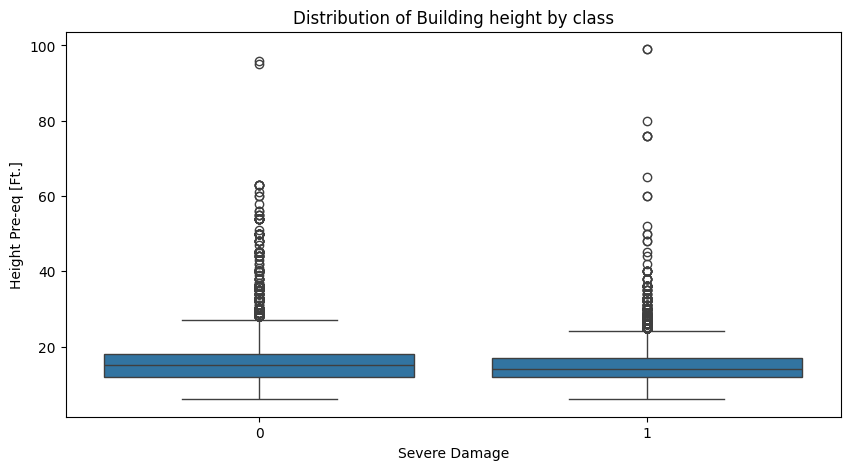

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(x='severe_damage', y='height_ft_pre_eq', data=df)
#Label Axis
plt.xlabel('Severe Damage')
plt.ylabel('Height Pre-eq [Ft.]')
plt.title('Distribution of Building height by class')
plt.show()

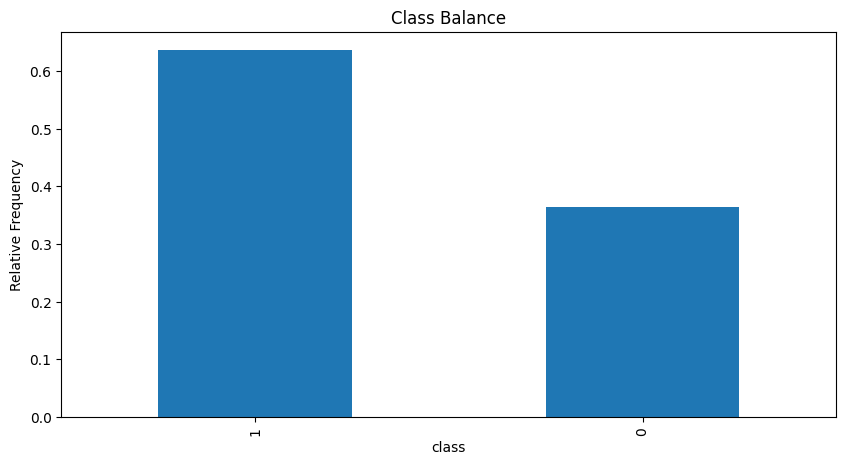

In [76]:
plt.figure(figsize=(10,5))
df['severe_damage'].value_counts(normalize=True).plot(
    kind='bar',
    xlabel='class', ylabel='Relative Frequency', title='Class Balance')
plt.show()

In [77]:
foundation_pivot = pd.pivot_table(
    df, index='foundation_type', values='severe_damage', aggfunc='mean').sort_values(by='severe_damage')
foundation_pivot

,severe_damage
foundation_type,
RC,0.027134
Bamboo/Timber,0.321429
Cement-Stone/Brick,0.410200
Mud mortar-Stone/Brick,0.684101
Other,0.801020


<Figure size 1000x500 with 0 Axes>

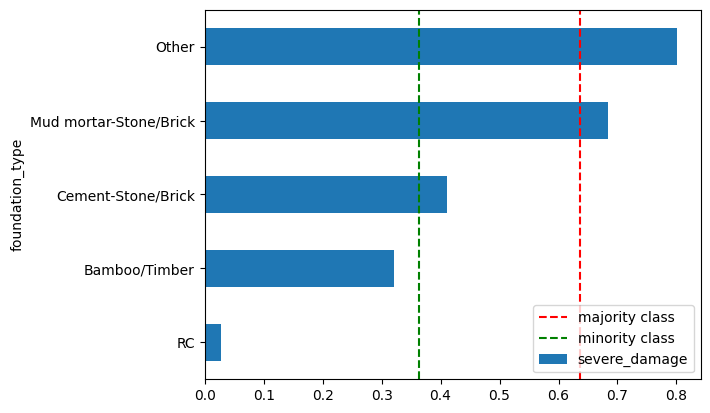

In [78]:
plt.figure(figsize=(10,5))
foundation_pivot.plot(kind='barh')
plt.axvline(
    majority_class_prop, linestyle='--', color='red', label='majority class')
plt.axvline(
    minority_class_prop, linestyle='--', color='green', label='minority class')
plt.legend(loc='lower right')
plt.show()

In [79]:
majority_class_prop, minority_class_prop =df['severe_damage'].value_counts(normalize=True)

In [80]:
df.select_dtypes('object').nunique()

foundation_type            5
ground_floor_type          5
land_surface_condition     3
other_floor_type           4
plan_configuration        10
position                   4
roof_type                  3
superstructure            11
dtype: int64

In [81]:
target = 'severe_damage'
feature = df.drop('severe_damage', axis=1)
X = feature
y = df[target]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [83]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuraccy:", round(acc_baseline, 2))

Baseline Accuraccy: 0.64


In [84]:
model = Pipeline([
    ('ohe', OneHotEncoder(use_cat_names=True)),
    ('sc', StandardScaler()),
    ('lr', LogisticRegression())
])

In [85]:
model.fit(X_train, y_train)

Pipeline(steps=[('ohe',
                 OneHotEncoder(cols=['foundation_type', 'ground_floor_type',
                                     'land_surface_condition',
                                     'other_floor_type', 'plan_configuration',
                                     'position', 'roof_type',
                                     'superstructure'],
                               use_cat_names=True)),
                ('sc', StandardScaler()), ('lr', LogisticRegression())])

In [86]:
model.score(X_train, y_train)

0.7146448069933876

In [89]:
y_pred = model.predict(X_test)

In [87]:
features = model.named_steps['ohe'].get_feature_names_out()
importances = model.named_steps['lr'].coef_[0]

In [88]:
feat_imp = pd.Series(np.exp(importances), index=features).sort_values()
feat_imp.info

<bound method Series.info of superstructure_cement_mortar_brick                    0.770855
foundation_type_RC                                    0.792525
superstructure_rc_non_engineered                      0.826762
roof_type_RCC/RB/RBC                                  0.829138
ground_floor_type_RC                                  0.869232
superstructure_rc_engineered                          0.876611
count_floors_pre_eq                                   0.894033
superstructure_cement_mortar_stone                    0.916113
other_floor_type_RCC/RB/RBC                           0.924294
superstructure_other                                  0.925160
superstructure_mud_mortar_brick                       0.934620
other_floor_type_Not applicable                       0.936309
plan_configuration_Multi-projected                    0.949972
superstructure_bamboo                                 0.950346
superstructure_timber                                 0.953340
foundation_type_Bamboo/Tim

Text(0.5, 0, 'Odds Ratio')

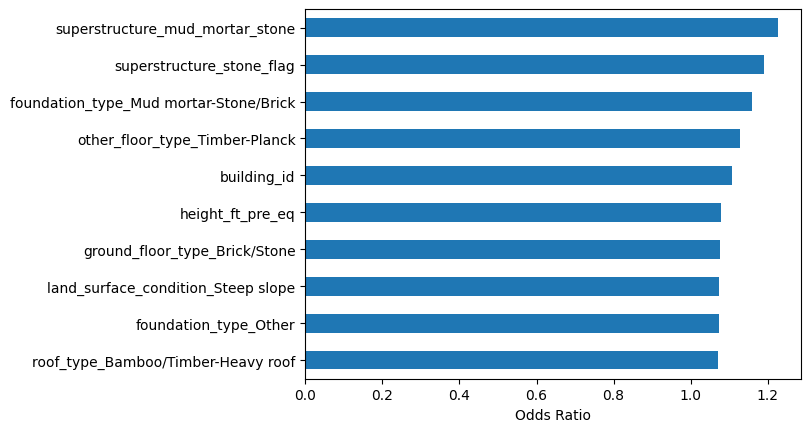

In [54]:
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Odds Ratio')

Text(0.5, 0, 'Odds Ratio')

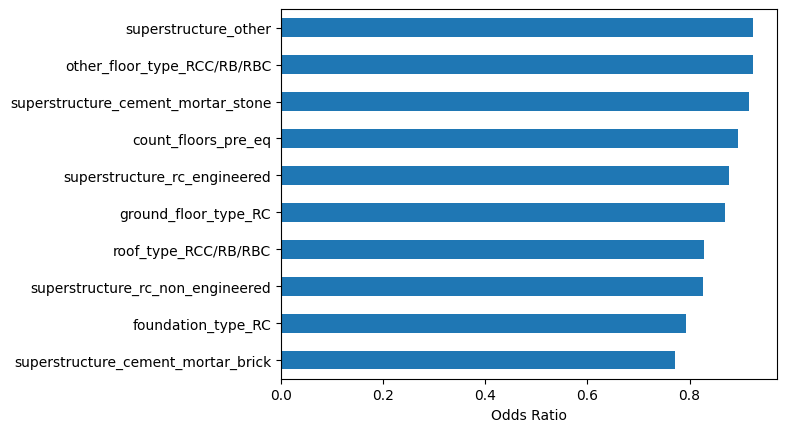

In [57]:
feat_imp.head(10).plot(kind='barh')
plt.xlabel("Odds Ratio")

In [92]:
print(f"Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.7097662504002562
